In [ ]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("data.csv")

In [11]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
print(X_train.shape)

torch.Size([614, 8])


In [10]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [43]:
class SimpleANN(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x
        

In [63]:
torch.manual_seed(20)
ann = SimpleANN()

In [64]:
ann.parameters

<bound method Module.parameters of SimpleANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [65]:
ann.parameters()

<generator object Module.parameters at 0x0000021B4DBD1148>

In [66]:
loss_function=nn.CrossEntropyLoss()
optim = torch.optim.Adam(ann.parameters(), lr=0.01)

In [67]:
import time
start = time.time()
epochs=10000
final_loss=[]

for i in range(epochs):
    
    y_pred=ann.forward(X_train)
    loss=loss_function(y_pred,y_train)
    
    final_loss.append(loss.item())
    
    if (i+1)%100 == 0:
        print(f"Epoch: {i+1} | Loss: {loss.item()}")
        
    optim.zero_grad()
    loss.backward()
    optim.step()
    
end = time.time()

print("time taken:", end-start)

Epoch: 100 | Loss: 0.5063002705574036
Epoch: 200 | Loss: 0.44328904151916504
Epoch: 300 | Loss: 0.4042840898036957
Epoch: 400 | Loss: 0.37870198488235474
Epoch: 500 | Loss: 0.36796247959136963
Epoch: 600 | Loss: 0.3643849790096283
Epoch: 700 | Loss: 0.3220682740211487
Epoch: 800 | Loss: 0.30313965678215027
Epoch: 900 | Loss: 0.3857046365737915
Epoch: 1000 | Loss: 0.2787249684333801
Epoch: 1100 | Loss: 0.26574593782424927
Epoch: 1200 | Loss: 0.2662355899810791
Epoch: 1300 | Loss: 0.25911152362823486
Epoch: 1400 | Loss: 0.2517794370651245
Epoch: 1500 | Loss: 0.24227875471115112
Epoch: 1600 | Loss: 0.23117274045944214
Epoch: 1700 | Loss: 0.243038609623909
Epoch: 1800 | Loss: 0.21759870648384094
Epoch: 1900 | Loss: 0.21123935282230377
Epoch: 2000 | Loss: 0.20796218514442444
Epoch: 2100 | Loss: 0.20095902681350708
Epoch: 2200 | Loss: 0.2007753998041153
Epoch: 2300 | Loss: 0.2214009016752243
Epoch: 2400 | Loss: 0.20400486886501312
Epoch: 2500 | Loss: 0.21032239496707916
Epoch: 2600 | Loss: 0

Text(0.5, 0, 'Epoch')

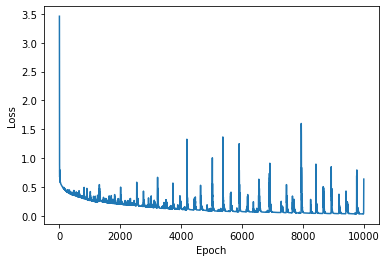

In [69]:
plt.plot(range(epochs),final_loss)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [72]:
predictions=[]
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred=ann(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred)
        print(y_pred.argmax().item())
        print("----------")

tensor([14.8139, 29.8733])
1
----------
tensor([ 11.1568, -11.9420])
0
----------
tensor([-5.5015,  5.7348])
1
----------
tensor([6.8937, 3.8641])
0
----------
tensor([27.4362, -7.2696])
0
----------
tensor([ 6.8039, -7.4108])
0
----------
tensor([-5.8554,  3.8504])
1
----------
tensor([ 2.2768, 10.4183])
1
----------
tensor([1.5687, 0.3110])
0
----------
tensor([ 6.4357, -5.3342])
0
----------
tensor([-3.6359,  9.0132])
1
----------
tensor([2.4198, 8.3326])
1
----------
tensor([11.8897, -1.5394])
0
----------
tensor([-7.3564,  7.4225])
1
----------
tensor([ 9.0774, -8.4395])
0
----------
tensor([4.2240, 9.3687])
1
----------
tensor([ 6.6458, 10.3485])
1
----------
tensor([6.1180, 3.7330])
0
----------
tensor([ 2.7879, 11.4387])
1
----------
tensor([ 7.0551, -3.4259])
0
----------
tensor([12.5032,  7.1529])
0
----------
tensor([ 49.3351, -27.4355])
0
----------
tensor([ 41.4504, -14.2740])
0
----------
tensor([ 43.0501, -34.4949])
0
----------
tensor([ 10.0553, -11.1890])
0
----------


In [73]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[86, 21],
       [28, 19]], dtype=int64)

Text(33.0, 0.5, 'Predicted Values')

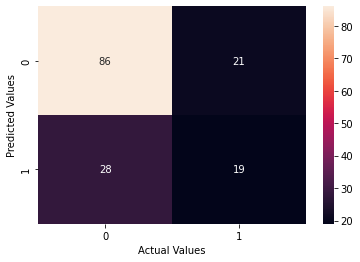

In [75]:
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [76]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score 

0.6818181818181818

In [78]:
torch.save(ann,'my_ann.pt')

In [80]:
model=torch.load('my_ann.pt')

In [81]:
model.eval()

SimpleANN(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [90]:
def fetch_data(df, no_of_rows=5):
    data=[]
    for i in range(no_of_rows):
        data.append(list(df.iloc[i,:-1]))
    return data

In [91]:
data=fetch_data(df,5)
data

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0],
 [1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0],
 [8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0],
 [1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0],
 [0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0]]

In [92]:
for i in data:
    print(i)

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0]
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0]
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0]
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0]


In [85]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
with torch.no_grad():
    for i in data:
        i=torch.tensor(i)
        print(model(i))
        print(model(i).argmax().item())

tensor([5.7553, 8.0201])
1
tensor([7.1767, 1.6835])
0
tensor([18.6777, 18.7286])
1
tensor([ 19.7952, -21.4235])
0
tensor([2.8481, 6.7625])
1
